### Import Libraries and Data Sets

In [6]:
import pandas as pd
import pickle
import seaborn as sns 
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [22]:
with open('Leslie_all.pickle','rb') as read_file:
    leslie_episodes = pickle.load(read_file)

leslie_episodes.head()

,Character,Episode,Episode_Split,Episode_Text
0,Leslie Knope,s1e01,s1e01,"Hello. Hi. My name is Leslie Knope, and I work..."
1,Leslie Knope,s1e02,s1e02,"Well, one of the funner things that we do here..."
2,Leslie Knope,s1e03,s1e03,The Parks Department has so many programs. Jer...
3,Leslie Knope,s1e04,s1e04,"I don't believe it. Oh, my God. It's real. Hey..."
4,Leslie Knope,s1e05,s1e05,"In a town as old as Pawnee, there's a lot of h..."


In [23]:
with open('Ron_all.pickle','rb') as read_file:
    ron_episodes = pickle.load(read_file)

ron_episodes.head()

,Character,Episode,Episode_Split,Episode_Text
0,Ron Swanson,s1e01,s1e01,Tonight is our next monthly community outreach...
1,Ron Swanson,s1e02,s1e02,"Uh, sure, Paul. What can I do for you? Yeah, a..."
2,Ron Swanson,s1e03,s1e03,"No comment. Hey, Haverford, maybe one day you'..."
3,Ron Swanson,s1e04,s1e04,Go to jail? What's going on? Put it in an emai...
4,Ron Swanson,s1e05,s1e05,The only reason anybody's going to this thing ...


In [56]:
with open('Leslie_Ron_Convo.pickle','rb') as read_file:
    leslie_ron = pickle.load(read_file)

leslie_ron.head()

,index,Character,Episode,Episode_Split,Episode_Text
0,21,Leslie Knope,s1e01,s1e01,"Here we go! Okay, wake up. Here we go. Out of ..."
1,32,Ron Swanson,s1e01,s1e01,Tonight is our next monthly community outreach...
2,33,Leslie Knope,s1e01,s1e01,And that is tonight.
3,34,Ron Swanson,s1e01,s1e01,That is tonight.
4,35,Leslie Knope,s1e01,s1e01,Right.


In [68]:
with open('Leslie_Ron_Mention.pickle','rb') as read_file:
    leslie_ron_mention = pickle.load(read_file)

leslie_ron_mention.head()

,index,Character,Line,Line_Number,Episode,Episode_Split,Leslie_Mentions_Ron,Ron_Mentions_Leslie
0,0,Leslie Knope,Hello.,0,s1e01,s1e01,False,False
1,1,Leslie Knope,Hi.,1,s1e01,s1e01,False,False
2,2,Leslie Knope,"My name is Leslie Knope, and I work for the Pa...",2,s1e01,s1e01,False,False
3,3,Leslie Knope,Can I ask you a few questions?,3,s1e01,s1e01,False,False
4,4,Leslie Knope,"Would you say that you are, ""Enjoying yourself...",4,s1e01,s1e01,False,False


In [4]:
analyzer = SentimentIntensityAnalyzer()

In [26]:
leslie_episodes['neg'] = leslie_episodes['Episode_Text'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
leslie_episodes['neu'] = leslie_episodes['Episode_Text'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
leslie_episodes['pos'] = leslie_episodes['Episode_Text'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
leslie_episodes['season'] = leslie_episodes['Episode'].str[:2]
leslie_episodes.head()

,Character,Episode,Episode_Split,Episode_Text,neg,neu,pos,season
0,Leslie Knope,s1e01,s1e01,"Hello. Hi. My name is Leslie Knope, and I work...",0.035,0.776,0.189,s1
1,Leslie Knope,s1e02,s1e02,"Well, one of the funner things that we do here...",0.071,0.746,0.183,s1
2,Leslie Knope,s1e03,s1e03,The Parks Department has so many programs. Jer...,0.074,0.746,0.180,s1
3,Leslie Knope,s1e04,s1e04,"I don't believe it. Oh, my God. It's real. Hey...",0.077,0.754,0.169,s1
4,Leslie Knope,s1e05,s1e05,"In a town as old as Pawnee, there's a lot of h...",0.048,0.744,0.207,s1


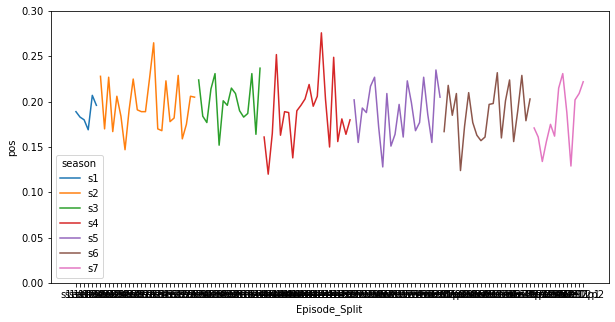

In [35]:
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots() 
ax.set_ylim(0, .3)  
sns.lineplot(data = leslie_episodes, x = 'Episode_Split', y = 'pos', hue = 'season', ax=ax);

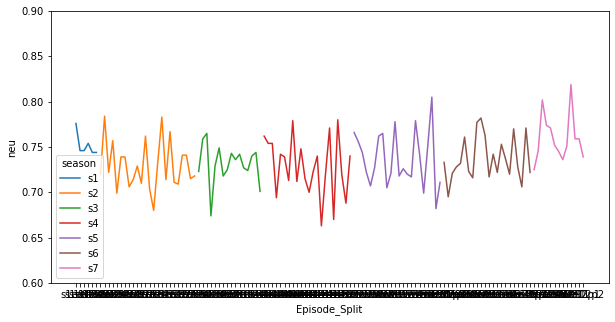

In [28]:
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots() 
ax.set_ylim(.6, .9)  
sns.lineplot(data = leslie_episodes, x = 'Episode_Split', y = 'neu', hue = 'season', ax=ax);

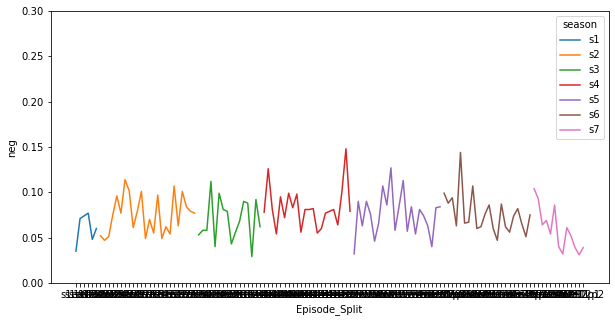

In [36]:
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots() 
ax.set_ylim(0, .3)  
sns.lineplot(data = leslie_episodes, x = 'Episode_Split', y = 'neg', hue = 'season', ax=ax);

In [48]:
leslie_episodes['Episode_Number'] = leslie_episodes.index + 1

In [49]:
leslie_episodes.to_csv('Leslie_Sentiment.csv')

In [30]:
ron_episodes['neg'] = ron_episodes['Episode_Text'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
ron_episodes['neu'] = ron_episodes['Episode_Text'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
ron_episodes['pos'] = ron_episodes['Episode_Text'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
ron_episodes['season'] = ron_episodes['Episode'].str[:2]
ron_episodes.head()

,Character,Episode,Episode_Split,Episode_Text,neg,neu,pos,season
0,Ron Swanson,s1e01,s1e01,Tonight is our next monthly community outreach...,0.050,0.849,0.100,s1
1,Ron Swanson,s1e02,s1e02,"Uh, sure, Paul. What can I do for you? Yeah, a...",0.074,0.773,0.153,s1
2,Ron Swanson,s1e03,s1e03,"No comment. Hey, Haverford, maybe one day you'...",0.119,0.824,0.058,s1
3,Ron Swanson,s1e04,s1e04,Go to jail? What's going on? Put it in an emai...,0.083,0.813,0.104,s1
4,Ron Swanson,s1e05,s1e05,The only reason anybody's going to this thing ...,0.016,0.693,0.291,s1


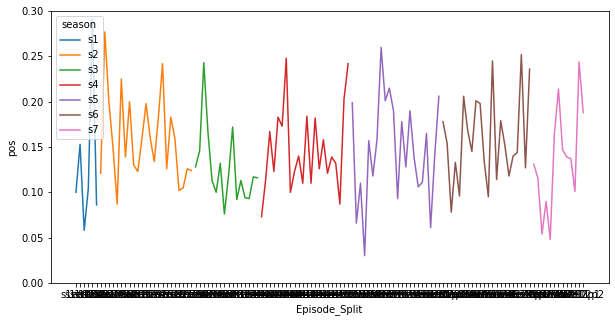

In [33]:
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots() 
ax.set_ylim(0, .3)  
sns.lineplot(data = ron_episodes, x = 'Episode_Split', y = 'pos', hue = 'season', ax=ax);

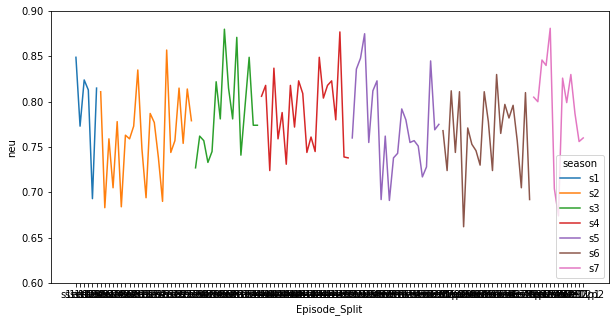

In [41]:
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots() 
ax.set_ylim(.6, .9)  
sns.lineplot(data = ron_episodes, x = 'Episode_Split', y = 'neu', hue = 'season', ax=ax);

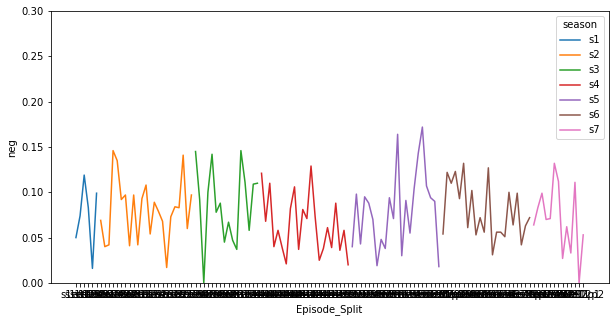

In [42]:
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots() 
ax.set_ylim(0, .3)  
sns.lineplot(data = ron_episodes, x = 'Episode_Split', y = 'neg', hue = 'season', ax=ax);

In [50]:
ron_episodes['Episode_Number'] = ron_episodes.index + 1

In [51]:
ron_episodes.to_csv('Ron_Sentiment.csv')

In [57]:
leslie_ron['Full_Episode_Text'] = leslie_ron.groupby('Episode_Split')['Episode_Text'].transform(lambda x : ' '.join(x))
leslie_ron.head()

,index,Character,Episode,Episode_Split,Episode_Text,Full_Episode_Text
0,21,Leslie Knope,s1e01,s1e01,"Here we go! Okay, wake up. Here we go. Out of ...","Here we go! Okay, wake up. Here we go. Out of ..."
1,32,Ron Swanson,s1e01,s1e01,Tonight is our next monthly community outreach...,"Here we go! Okay, wake up. Here we go. Out of ..."
2,33,Leslie Knope,s1e01,s1e01,And that is tonight.,"Here we go! Okay, wake up. Here we go. Out of ..."
3,34,Ron Swanson,s1e01,s1e01,That is tonight.,"Here we go! Okay, wake up. Here we go. Out of ..."
4,35,Leslie Knope,s1e01,s1e01,Right.,"Here we go! Okay, wake up. Here we go. Out of ..."


In [58]:
leslie_ron.drop(columns = ['index', 'Character', 'Episode_Text'], inplace = True)
leslie_ron.drop_duplicates(inplace = True)
leslie_ron

,Episode,Episode_Split,Full_Episode_Text
0,s1e01,s1e01,"Here we go! Okay, wake up. Here we go. Out of ..."
21,s1e02,s1e02,Nope. There's a new wind blowing in government...
42,s1e03,s1e03,"Oh, tons of people have. Yeah, we get letters ..."
44,s1e04,s1e04,"Go to jail? What's going on? Ron, I have a ver..."
83,s1e05,s1e05,"Oh, I already know, the one on the left where ..."
...,...,...,...
2110,s7e09,s7e09,Donna likes those things. Dollars to donuts th...
2112,s7e10,s7e10,"No! Son, we spent four days making that."
2114,s7e11,s7e11,I've seen Salvatore the first Tuesday of the m...
2116,s7e12,s7e12p1,"Perhaps we could skip ahead, and just hit the ..."


In [59]:
leslie_ron['neg'] = leslie_ron['Full_Episode_Text'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
leslie_ron['neu'] = leslie_ron['Full_Episode_Text'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
leslie_ron['pos'] = leslie_ron['Full_Episode_Text'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
leslie_ron['season'] = leslie_ron['Episode'].str[:2]
leslie_ron.head()

,Episode,Episode_Split,Full_Episode_Text,neg,neu,pos,season
0,s1e01,s1e01,"Here we go! Okay, wake up. Here we go. Out of ...",0.039,0.852,0.109,s1
21,s1e02,s1e02,Nope. There's a new wind blowing in government...,0.081,0.769,0.150,s1
42,s1e03,s1e03,"Oh, tons of people have. Yeah, we get letters ...",0.070,0.860,0.070,s1
44,s1e04,s1e04,"Go to jail? What's going on? Ron, I have a ver...",0.098,0.770,0.131,s1
83,s1e05,s1e05,"Oh, I already know, the one on the left where ...",0.054,0.750,0.195,s1


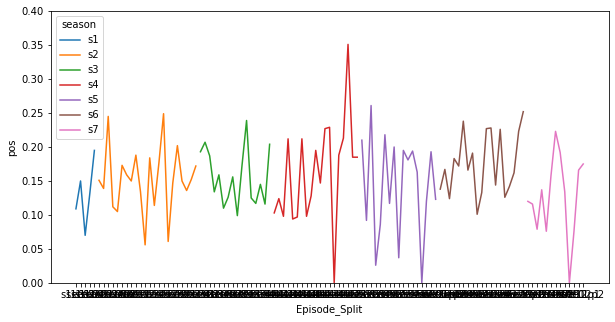

In [62]:
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots() 
ax.set_ylim(0, .4)  
sns.lineplot(data = leslie_ron, x = 'Episode_Split', y = 'pos', hue = 'season', ax=ax);

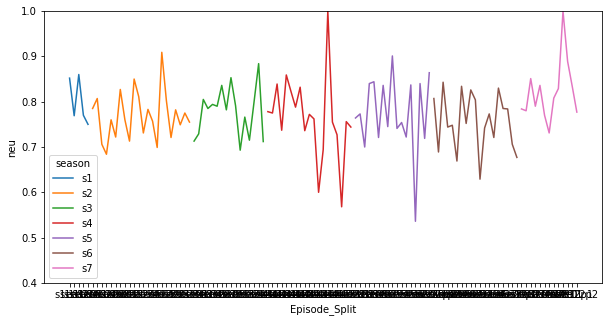

In [64]:
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots() 
ax.set_ylim(.4, 1)  
sns.lineplot(data = leslie_ron, x = 'Episode_Split', y = 'neu', hue = 'season', ax=ax);

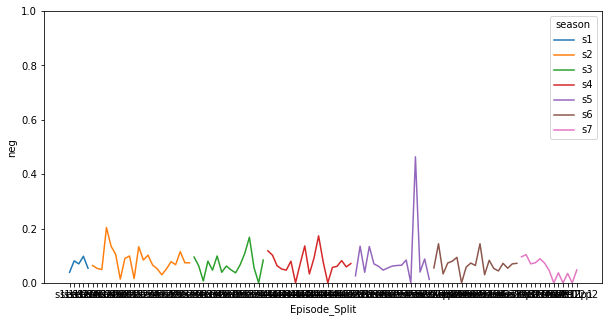

In [66]:
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots() 
ax.set_ylim(0, 1)  
sns.lineplot(data = leslie_ron, x = 'Episode_Split', y = 'neg', hue = 'season', ax=ax);

In [80]:
leslie_ron.tail(50)

,Episode,Episode_Split,Full_Episode_Text,neg,neu,pos,season
1306,s4e22,s4e22,"That's a nice chair. Corinthian leather, solid...",0.071,0.744,0.185,s4
1313,s5e01,s5e01,"No. ""In this temple, ""As in the hearts of the ...",0.026,0.764,0.210,s5
1321,s5e02,s5e02,What did you put in the sugar? It's so good. M...,0.135,0.773,0.092,s5
1354,s5e03,s5e03,"Yes, ma'am. Yes, I do. Councilman, you have gr...",0.039,0.700,0.261,s5
1358,s5e04,s5e04,Two more things. When you do get your phone ba...,0.134,0.840,0.026,s5
1360,s5e05,s5e05,"I know. I'm sorry, Diane. I really am. I've be...",0.070,0.844,0.086,s5
1362,s5e06,s5e06,"Oh, okay. Get ready, driver. We're gonna make ...",0.061,0.721,0.218,s5
1364,s5e07,s5e07,I have created a monster. And now I need to de...,0.047,0.836,0.117,s5
1378,s5e09,s5e09,"Merry CongratuChristmas! What? Half ""Merry Chr...",0.055,0.745,0.200,s5
1430,s5e13,s5e13,That's a risk we're gonna have to take. Our to...,0.062,0.901,0.037,s5


In [81]:
leslie_ron['Word_Count'] = leslie_ron['Full_Episode_Text'].str.strip().str.split(" ").str.len()
leslie_ron.tail(50)

,Episode,Episode_Split,Full_Episode_Text,neg,neu,pos,season,Word_Count
1306,s4e22,s4e22,"That's a nice chair. Corinthian leather, solid...",0.071,0.744,0.185,s4,180
1313,s5e01,s5e01,"No. ""In this temple, ""As in the hearts of the ...",0.026,0.764,0.210,s5,252
1321,s5e02,s5e02,What did you put in the sugar? It's so good. M...,0.135,0.773,0.092,s5,597
1354,s5e03,s5e03,"Yes, ma'am. Yes, I do. Councilman, you have gr...",0.039,0.700,0.261,s5,84
1358,s5e04,s5e04,Two more things. When you do get your phone ba...,0.134,0.840,0.026,s5,111
1360,s5e05,s5e05,"I know. I'm sorry, Diane. I really am. I've be...",0.070,0.844,0.086,s5,88
1362,s5e06,s5e06,"Oh, okay. Get ready, driver. We're gonna make ...",0.061,0.721,0.218,s5,26
1364,s5e07,s5e07,I have created a monster. And now I need to de...,0.047,0.836,0.117,s5,272
1378,s5e09,s5e09,"Merry CongratuChristmas! What? Half ""Merry Chr...",0.055,0.745,0.200,s5,631
1430,s5e13,s5e13,That's a risk we're gonna have to take. Our to...,0.062,0.901,0.037,s5,46


In [85]:
leslie_ron_clean = leslie_ron[leslie_ron['Word_Count'] > 50]
leslie_ron_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 2120
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Episode            96 non-null     object 
 1   Episode_Split      96 non-null     object 
 2   Full_Episode_Text  96 non-null     object 
 3   neg                96 non-null     float64
 4   neu                96 non-null     float64
 5   pos                96 non-null     float64
 6   season             96 non-null     object 
 7   Word_Count         96 non-null     int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 6.8+ KB


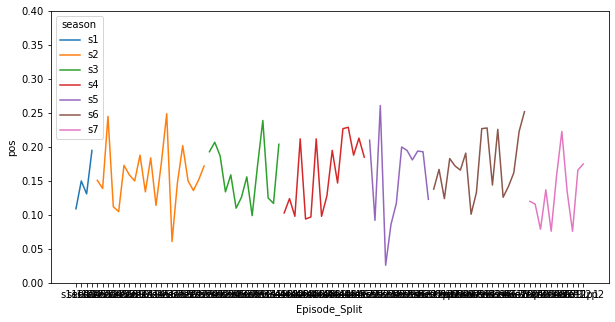

In [86]:
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots() 
ax.set_ylim(0, .4)  
sns.lineplot(data = leslie_ron_clean, x = 'Episode_Split', y = 'pos', hue = 'season', ax=ax);

In [88]:
leslie_ron_clean.head(50)

,Episode,Episode_Split,Full_Episode_Text,neg,neu,pos,season,Word_Count
0,s1e01,s1e01,"Here we go! Okay, wake up. Here we go. Out of ...",0.039,0.852,0.109,s1,468
21,s1e02,s1e02,Nope. There's a new wind blowing in government...,0.081,0.769,0.150,s1,375
44,s1e04,s1e04,"Go to jail? What's going on? Ron, I have a ver...",0.098,0.770,0.131,s1,649
83,s1e05,s1e05,"Oh, I already know, the one on the left where ...",0.054,0.750,0.195,s1,337
94,s2e01,s2e01,"Okay, here's the situation. Your parents went ...",0.064,0.785,0.151,s2,441
118,s2e02,s2e02,"Ron, did you get my texts? No. Did you get my ...",0.053,0.807,0.139,s2,322
141,s2e04,s2e04,I've established a scientifically perfect ten ...,0.049,0.706,0.245,s2,107
147,s2e05,s2e05,"They started it. Look, those guys were rude, a...",0.204,0.684,0.112,s2,138
158,s2e06,s2e06,"Don't do that. One, two, three. I'm sorry abou...",0.135,0.760,0.105,s2,137
170,s2e08,s2e08,"""Thank you, Old Gus, for brightening our lives...",0.105,0.722,0.173,s2,1338


In [72]:
leslie_mention_ron = leslie_ron_mention[ leslie_ron_mention['Leslie_Mentions_Ron'] == 1]
leslie_mention_ron.head()

,index,Character,Line,Line_Number,Episode,Episode_Split,Leslie_Mentions_Ron,Ron_Mentions_Leslie
174,334,Leslie Knope,"Ron, please.",334,s1e01,s1e01,True,False
177,337,Leslie Knope,"Come on, Ron.",337,s1e01,s1e01,True,False
182,342,Leslie Knope,"Ron, I don't know how to explain this to you.",342,s1e01,s1e01,True,False
189,349,Leslie Knope,"And let me tell you something, Ron.",349,s1e01,s1e01,True,False
628,134,Leslie Knope,"This is Ron Swanson, our boss.",134,s1e03,s1e03,True,False


In [73]:
leslie_mention_ron['Episode_Text'] = leslie_mention_ron.groupby('Episode_Split')['Line'].transform(lambda x : ' '.join(x))
leslie_mention_ron.head()

<ipython-input-73-2c7758bafe28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leslie_mention_ron['Episode_Text'] = leslie_mention_ron.groupby('Episode_Split')['Line'].transform(lambda x : ' '.join(x))


,index,Character,Line,Line_Number,Episode,Episode_Split,Leslie_Mentions_Ron,Ron_Mentions_Leslie,Episode_Text
174,334,Leslie Knope,"Ron, please.",334,s1e01,s1e01,True,False,"Ron, please. Come on, Ron. Ron, I don't know h..."
177,337,Leslie Knope,"Come on, Ron.",337,s1e01,s1e01,True,False,"Ron, please. Come on, Ron. Ron, I don't know h..."
182,342,Leslie Knope,"Ron, I don't know how to explain this to you.",342,s1e01,s1e01,True,False,"Ron, please. Come on, Ron. Ron, I don't know h..."
189,349,Leslie Knope,"And let me tell you something, Ron.",349,s1e01,s1e01,True,False,"Ron, please. Come on, Ron. Ron, I don't know h..."
628,134,Leslie Knope,"This is Ron Swanson, our boss.",134,s1e03,s1e03,True,False,"This is Ron Swanson, our boss. Ron, this is th..."


In [76]:
leslie_mention_ron2 = leslie_mention_ron[['Episode', 'Episode_Split', 'Episode_Text']]
leslie_mention_ron2.drop_duplicates(inplace=True)
leslie_mention_ron2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 174 to 22831
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Episode        75 non-null     object
 1   Episode_Split  75 non-null     object
 2   Episode_Text   75 non-null     object
dtypes: object(3)
memory usage: 2.3+ KB


<ipython-input-76-ee1e4c2c03e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leslie_mention_ron2.drop_duplicates(inplace=True)


In [77]:
leslie_mention_ron2['neg'] = leslie_mention_ron2['Episode_Text'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
leslie_mention_ron2['neu'] = leslie_mention_ron2['Episode_Text'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
leslie_mention_ron2['pos'] = leslie_mention_ron2['Episode_Text'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
leslie_mention_ron2['season'] = leslie_mention_ron2['Episode'].str[:2]
leslie_mention_ron2.head()

<ipython-input-77-64d5e5282816>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leslie_mention_ron2['neg'] = leslie_mention_ron2['Episode_Text'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
<ipython-input-77-64d5e5282816>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leslie_mention_ron2['neu'] = leslie_mention_ron2['Episode_Text'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
<ipython-input-77-64d5e5282816>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,Episode,Episode_Split,Episode_Text,neg,neu,pos,season
174,s1e01,s1e01,"Ron, please. Come on, Ron. Ron, I don't know h...",0.000,0.901,0.099,s1
628,s1e03,s1e03,"This is Ron Swanson, our boss. Ron, this is th...",0.000,1.000,0.000,s1
945,s1e04,s1e04,"Ron, I have a very important and very long sto...",0.033,0.765,0.202,s1
1206,s1e05,s1e05,"Thank you, Ron.",0.000,0.444,0.556,s1
1780,s2e02,s2e02,"Ron, did you get my texts? If I wanted to, I c...",0.000,1.000,0.000,s2


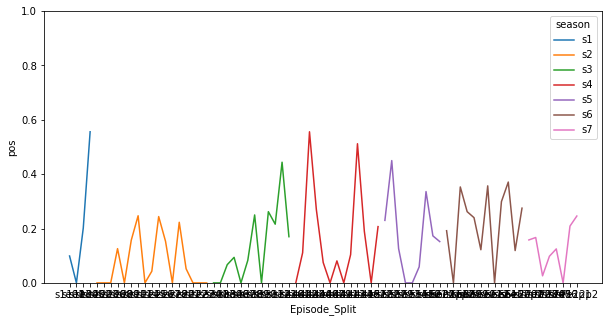

In [79]:
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots() 
ax.set_ylim(0, 1)
sns.lineplot(data = leslie_mention_ron2, x = 'Episode_Split', y = 'pos', hue = 'season', ax=ax);